In [7]:
import cv2

In [8]:

import matplotlib.pyplot as plt


In [70]:
img = cv2.imread('/Users/pragya/Desktop/emotionScanner/happyboy.jpg')


In [44]:
import matplotlib.pyplot as plt


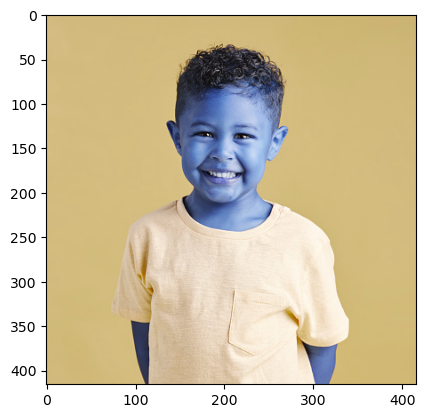

In [71]:
plt.imshow(img) ## BGR

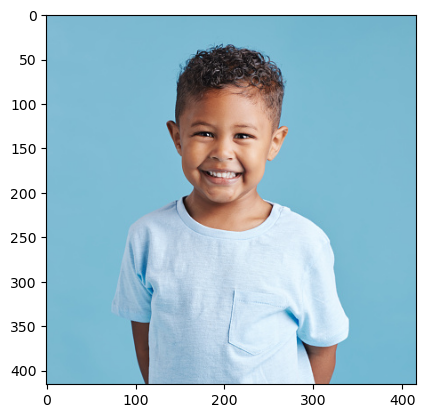

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [49]:
from deepface import DeepFace ## pip install deepface

2023-10-31 21:49:37.286166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Directory  /Users/pragya /.deepface created
Directory  /Users/pragya /.deepface/weights created


In [50]:
predictions =  DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /Users/pragya/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 21.6MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /Users/pragya/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:19<00:00, 27.5MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /Users/pragya/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:16<00:00, 32.4MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /Users/pragya/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:19<00:00, 27.2MB/s] 
Action: race: 100%|██████████| 4/4 [00:23<00:00,  5.87s/it]   


In [51]:
predictions

[{'emotion': {'angry': 1.0699653385515262e-07,
   'disgust': 9.53100265794056e-15,
   'fear': 3.7288230281262713e-07,
   'happy': 99.94317889213562,
   'sad': 2.431710388606234e-07,
   'surprise': 0.0005528533620235976,
   'neutral': 0.056272075744345784},
  'dominant_emotion': 'happy',
  'region': {'x': 136, 'y': 87, 'w': 123, 'h': 123},
  'age': 33,
  'gender': {'Woman': 2.2439179942011833, 'Man': 97.7560818195343},
  'dominant_gender': 'Man',
  'race': {'asian': 16.089996695518494,
   'indian': 11.35634034872055,
   'black': 42.441776394844055,
   'white': 3.719240427017212,
   'middle eastern': 3.654828295111656,
   'latino hispanic': 22.737815976142883},
  'dominant_race': 'black'}]

In [55]:
type(predictions)

list

## draws ROI (rectangle of interest to focus on certain part of face)

In [80]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [83]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [89]:
faceCascade.load('haarcascade_frontalface_default.xml')

False

In [90]:
faceCascade.load('/Users/pragya/Desktop/emotionScanner/haarcascade_frontalface_default.xml')

True

In [91]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


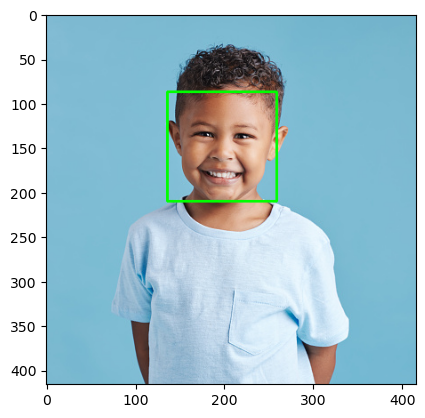

In [92]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [112]:
import pprint
myDataset = predictions #insert your dataset into this
pprint.pprint(myDataset)

[{'age': 33,
  'dominant_emotion': 'happy',
  'dominant_gender': 'Man',
  'dominant_race': 'black',
  'emotion': {'angry': 1.0699653385515262e-07,
              'disgust': 9.53100265794056e-15,
              'fear': 3.7288230281262713e-07,
              'happy': 99.94317889213562,
              'neutral': 0.056272075744345784,
              'sad': 2.431710388606234e-07,
              'surprise': 0.0005528533620235976},
  'gender': {'Man': 97.7560818195343, 'Woman': 2.2439179942011833},
  'race': {'asian': 16.089996695518494,
           'black': 42.441776394844055,
           'indian': 11.35634034872055,
           'latino hispanic': 22.737815976142883,
           'middle eastern': 3.654828295111656,
           'white': 3.719240427017212},
  'region': {'h': 123, 'w': 123, 'x': 136, 'y': 87}}]


In [113]:
type(myDataset)

list

In [115]:
print(predictions[0]['dominant_emotion'])

happy


In [116]:
fontface = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, predictions[0]['dominant_emotion'], (0, 50), fontface, 1, (0, 0, 255), 2, cv2.LINE_4);

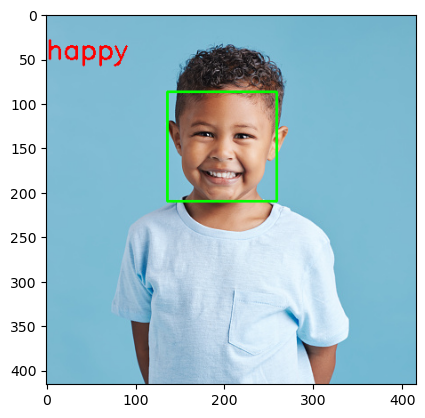

In [117]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
